In [6]:
using Pkg
Pkg.activate(".")
Pkg.add(["Plots","DifferentialEquations"])

using Plots
using DifferentialEquations

  Activating project at `~/Documents/GitHub/tmp/src`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed FFMPEG_jll ─ v4.4.2+2
  No Changes to `~/Documents/GitHub/tmp/src/Project.toml`
    Updating `~/Documents/GitHub/tmp/src/Manifest.toml`
  [b22a6f82] ↑ FFMPEG_jll v4.4.2+0 ⇒ v4.4.2+2
  [efcefdf7] + PCRE2_jll v10.40.0+0
Precompiling project...
  ✓ PCRE2_jll
  ✓ FFMPEG_jll
  ✓ FFMPEG
  ✓ GR_jll
  ✓ GR
  ✓ Plots
  6 dependencies successfully precompiled in 63 seconds. 380 already precompiled.
  5 dependencies precompiled but different versions are currently loaded. Restart julia to access the new versions


# Problem: A sliding object

A box slides down an infinite ramp inclined at an angle $\theta$ from the horizontal.
The ramp is slippery ($\mu = 0$) except for the strips of rough tapes [width $w$ with coefficient of restitution $\mu=(\mu_0>0)$] afixed perpendicular to the direction of slide.
The tapes are laid down every distance $w+d$ from each other resulting to slipery gap of $d$ between tapes.

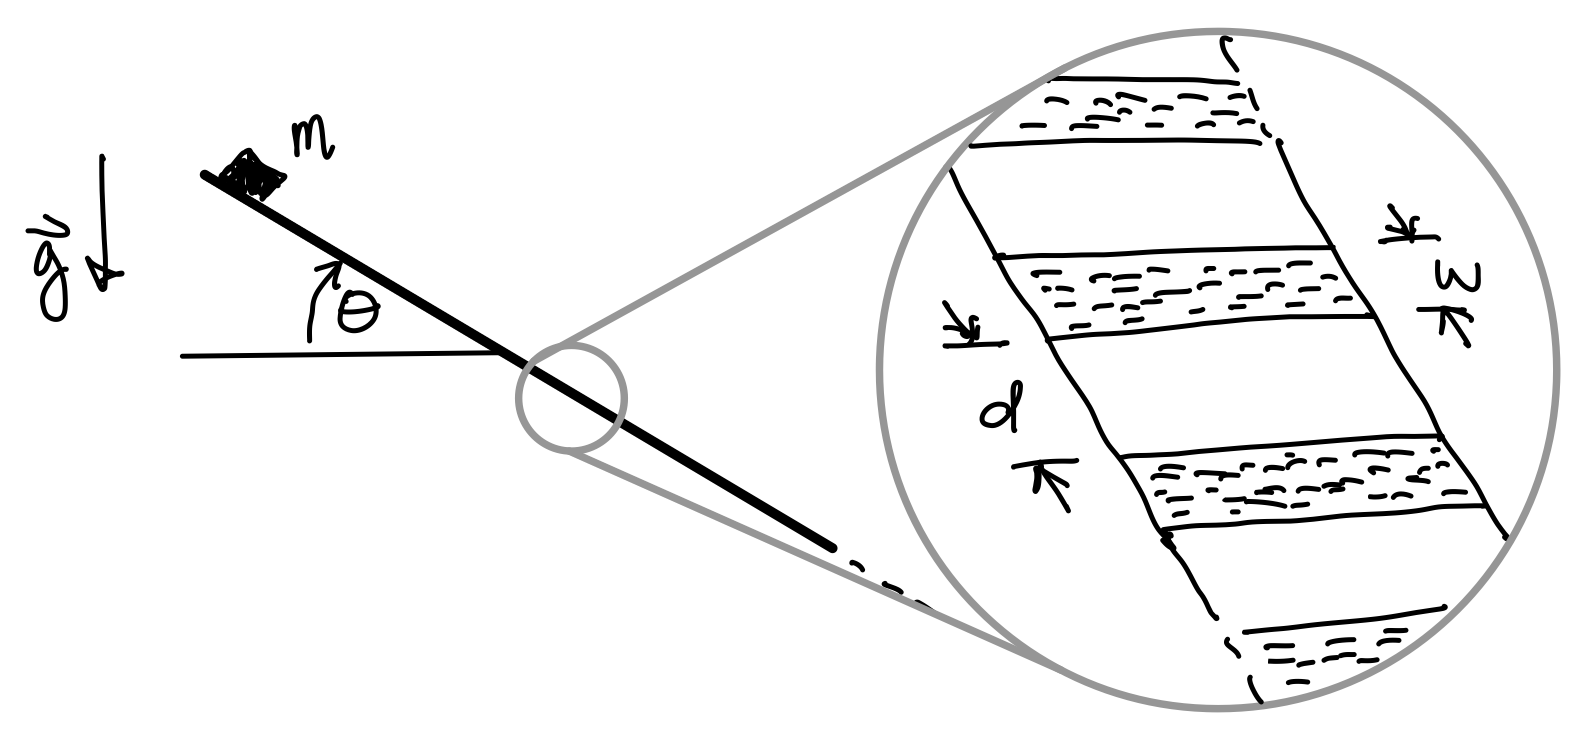

### Key Results
- [ ] KR1: A code for `μ(x,w,d;μ₀=0.50)` implementing the restitution function $\mu(x,w,d)$ as a function of the distance from the origin parametrized by the width $w$ and distance $d$.
It should return the appropriate $\mu$-value depending on where the box is along the ramp.
Assume an origin at the edge of a tape such that
\begin{equation}
\mu(x,w,d) = \begin{cases}
\mu_0, & 0 < \mod(x,w+d) < w\\
0,     & w < \mod(x,w+d) < d
\end{cases}
\end{equation}
Assume that $\mu_0=0.5$
- [ ] KR2: Plot of $\mu(x,w,d)$, including the examination of the known limit cases.

## Equation of motion

The equation of motion downwards the ramp is given by:
\begin{equation}
\ddot{x} = g[ \sin\theta - \mu(x)\cos\theta ]
\end{equation}
Where $\theta$ is the ramp angle from horizontal and $g$ is the usual $9.8~{\rm m}/{\rm s}^2$.

### Key Results
- [ ] KR3: Written down (using Markdown) two-variable first-degree ODE system resulting from the equation of motion.
- [ ] KR4: A code implementing the function for RHS of the second-order portion (as acceleration function `a(x,w,d)`) of the original equation of motion.
The acceleration function is given by
\begin{equation}
a(x,w,d;\mu,\theta) = g[\sin\theta - \mu(x,w,d;\mu)\sin\theta].
\end{equation}

We can let an integration variable
\begin{equation}
\mathbf{u} = \begin{bmatrix}
x \\
v
\end{bmatrix}
\end{equation}
such that the ODE becomes
\begin{equation}
\dot{\mathbf{u}} = \begin{bmatrix}
v \\
g[ \sin\theta - \mu(x,w,d) \cos\theta ]
\end{bmatrix}
\end{equation}

## Use `DifferentialEquations.jl` to solve

With the equation for $\dot{\mathbf{u}}$, we can use the ODE solver and find the solution for $x(t)$ and $v(t)$.

### Key Results

- [ ] KR5: A solution obtained via a known ODE solver (or a simple Euler or Vertlet method or your own).
An appropriate time step may be identified or be automatically set in algorithm.
- [ ] KR6: Plot of the solution for the first-order ODE system using the ODE solver.
    - [ ] KR6.1: Defined function `f(u,p,t)` for the integrand
    - [ ] KR6.2: Plot of the numerical solution for $x(t)$ and $v(t)$.
- [ ] KR7: Plot of the velocity against the position ($v$ vs $x$) together with the strip function proxy by $\mu(x)$.

### Solution handling

The ODE solver documentation with example is [available online](https://diffeq.sciml.ai/stable/tutorials/ode_example/).

The object `soln` (result of the function `solver()1` has a structure with variables that can be accessed easily.
[The documentation is available online](https://diffeq.sciml.ai/stable/basics/solution/#solution).

## Limit cases

Based on our elementary physics, the box will **not move at all** whenever a certain limit in the angle $\theta$ is met.
In the extreme, the box will not move at all when $\theta=0$.
There exists some critical angle $\theta\sim\theta_c>0$ such that the box will only move when $\theta>\theta_c$.

### Key Results

- [ ] KR8: Confirmed consistency for some limit cases
    - [ ] KR8.1: Shown consistency with analytic result when $w=0$ and for the given $\theta_c$
    - [ ] KR8.2: Shown consistency with analytic result when $d=0$.
- [ ] KR9: Evidence for the possible mistakes in the results of the standard ODE solvers.
- [ ] KR10: Implementation of an improved solver taking into account the possible source of mistake in how the standard ODE Solver solves the ODE problem.
- [ ] KR11: A summary of possible directions for improving the present solution.